### Ayushi Malaviya

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,auc,roc_auc_score
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('wisc_bc_ContinuousVar.csv', na_values = '?')

In [3]:
data.shape

(569, 32)

In [4]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Converted categorical data column into int by using label encoder.  

In [7]:
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

In [8]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Pearson Correlation to have look on each feature correlation with the target variables.
Here, As value is positive and closer to 1 is highly correlated. 

In [9]:
data.corrwith(data['diagnosis'], axis=0, method='pearson')

id                         0.039769
diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0

In [10]:
data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


0    357
1    212
Name: diagnosis, dtype: int64

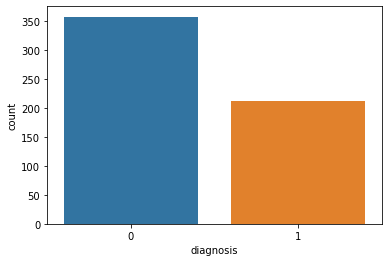

In [11]:
sns.countplot(x='diagnosis', data=data)
data['diagnosis'].value_counts()

In [12]:
X = pd.DataFrame(data.drop(['diagnosis'], axis=1))
y = data['diagnosis']

In [13]:
X = pd.DataFrame(X.drop(['id'], axis=1))

In [14]:
X.shape

(569, 30)

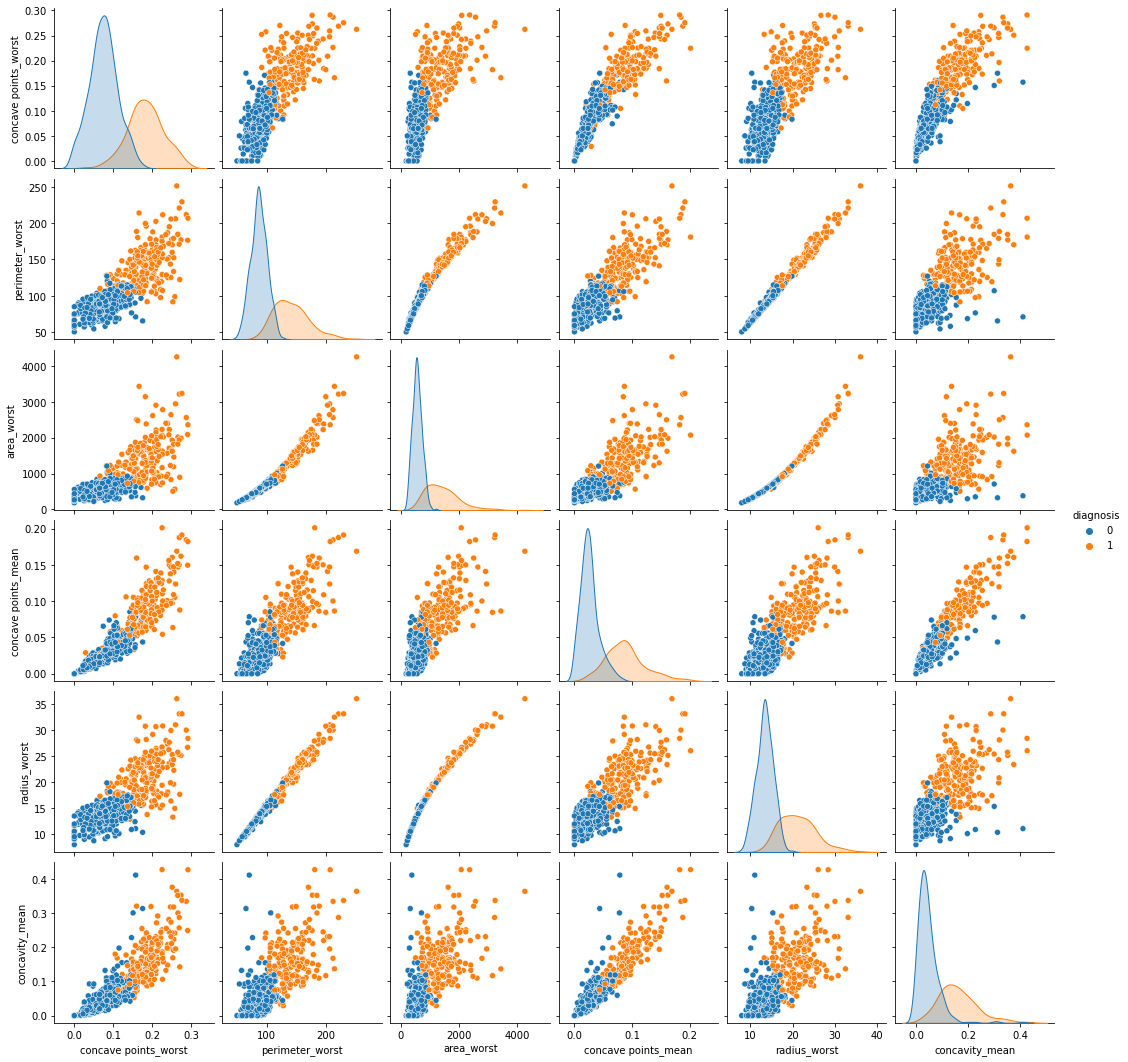

In [15]:
sns.pairplot(data, hue='diagnosis', vars=['concave points_worst', 'perimeter_worst', 'area_worst', 'concave points_mean', 'radius_worst', 'concavity_mean'])

### Hierarchical Cluster Analysis using Agglomerative Clustering 

#### Unscaled Dataset

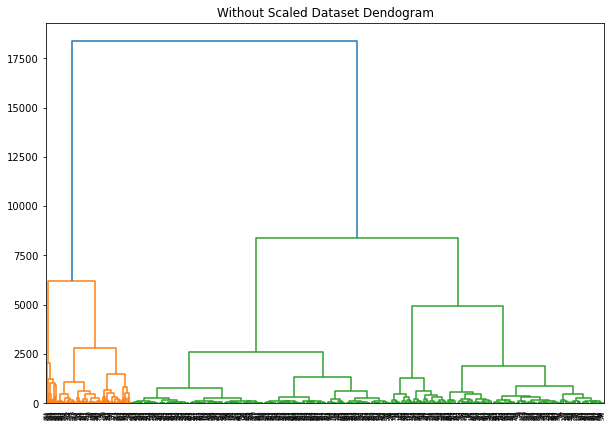

In [16]:
plt.figure(figsize=(10, 7))
plt.title("Without Scaled Dataset Dendogram")

clusters = hc.linkage(X,method='ward',metric="euclidean")
hc.dendrogram(Z=clusters)
plt.show()

Now, Our Data has many features which is hard to visualise on two dimensional and three dimensional techniques.
Hence, PCA technique is performed.

In [17]:
pca = PCA(n_components = 30)
pca.fit_transform(X)
pca.explained_variance_ratio_.cumsum()

array([0.98204467, 0.99822116, 0.99977867, 0.9998996 , 0.99998788,
       0.99999453, 0.99999854, 0.99999936, 0.99999971, 0.99999989,
       0.99999996, 0.99999998, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

Here, As we can see 1st feature can explain 98% of the data and when 1st feature combined to 2nd that can 
explain more than 99% of the data. Hence, I will be using PCA for 2 components.

In [26]:
pca2 = PCA(n_components = 2)
X_unscaled = pca2.fit_transform(X)
X_unscaled.shape

(569, 2)

In [27]:
pca_unscaled_0 = X_unscaled[:,0]
pca_unscaled_1 = X_unscaled[:,1]

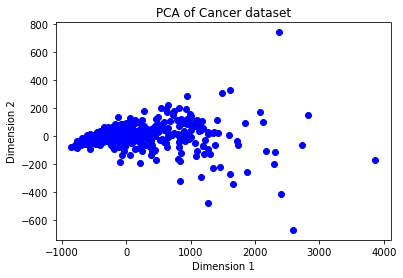

In [28]:
plt.scatter(pca_unscaled_0, pca_unscaled_1, color='blue')
plt.title("PCA of Cancer dataset")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(False)

In [29]:
clustered_unscaled = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clustered_unscale = clustered_unscaled.fit(X_unscaled)
unscaled_data_label = clustered_unscaled.labels_

Text(0.5, 1.0, 'Scaled Customer Data')

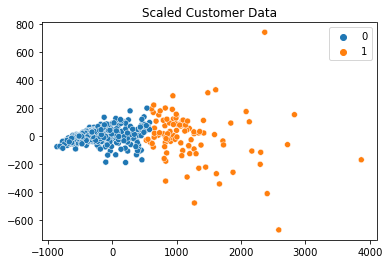

In [55]:
sns.scatterplot(x=pca_unscaled_0, y = pca_unscaled_1, data=X_unscaled, hue=unscaled_data_label).set_title('Scaled Customer Data')

In [31]:
target = ['Benign', 'Malignant']
print('Accuracy Score is: ',accuracy_score(y, unscaled_data_label)) #TP+FN/TP+TF+FP+FN
print('\n\n\nclassification_report : \n',classification_report(y, unscaled_data_label,target_names=target),'\n\n') 
#precision = TP/TP+FP & recall = TP/TP+TN & f1_score = harmonic_mean of pre and recall 
print('Confusion Matrix of data predicted \n',confusion_matrix(y, unscaled_data_label),'\n\n') #TP,TN,FP,FN,
print('The model with benign class has good precision(exactness) and recall(completeness) value along with high f1-score.')

Accuracy Score is:  0.804920913884007



classification_report : 
               precision    recall  f1-score   support

      Benign       0.76      1.00      0.87       357
   Malignant       1.00      0.48      0.65       212

    accuracy                           0.80       569
   macro avg       0.88      0.74      0.76       569
weighted avg       0.85      0.80      0.78       569
 


Confusion Matrix of data predicted 
 [[357   0]
 [111 101]] 


The model with benign class has good precision(exactness) and recall(completeness) value along with high f1-score.


### Scaled Data Hierarchical Cluster Analysis using Agglomerative Clustering

In [32]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_Scaled = scaler.fit_transform(X)

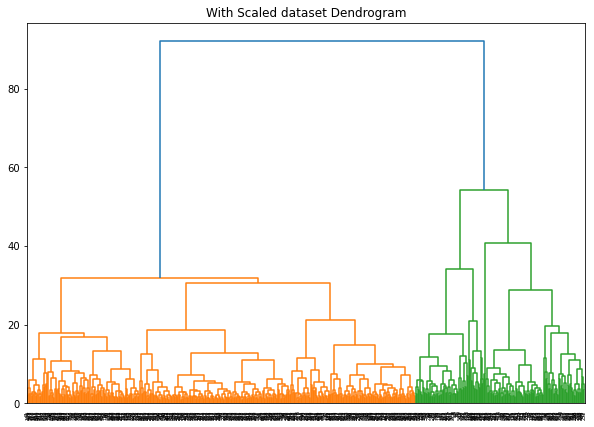

In [33]:
plt.figure(figsize=(10, 7))
plt.title("With Scaled dataset Dendrogram")

clusters = hc.linkage(X_Scaled,method='ward',metric="euclidean")
hc.dendrogram(Z=clusters)
plt.show()

In [34]:
pca1 = PCA(n_components = 2)
X_pca_scaled = pca1.fit_transform(X_Scaled)
X_pca_scaled.shape

(569, 2)

In [36]:
pca_scaled_0 = X_pca_scaled[:,0]
pca_scaled_1 = X_pca_scaled[:,1]

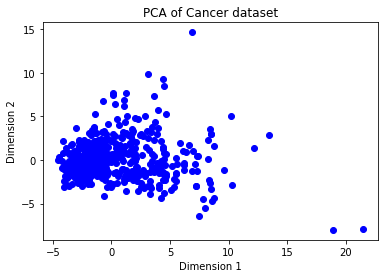

In [37]:
plt.scatter(pca_scaled_0, pca_scaled_1, color='blue')
plt.title("PCA of Cancer dataset")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(False)

In [40]:
clustering_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clustered_scaled = clustering_model.fit(X_pca_scaled)
scaled_data_labels = clustering_model.labels_

Text(0.5, 1.0, 'Scaled Cancer Data')

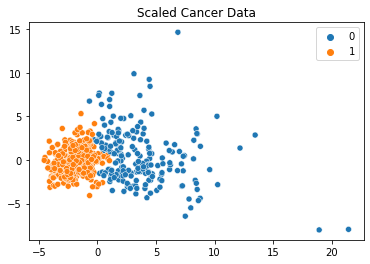

In [54]:
sns.scatterplot(x=pca_scaled_0, y = pca_scaled_1, data=X_pca_scaled, hue=scaled_data_labels).set_title('Scaled Cancer Data')

With scaled data it is developing bad model, as you can observe in the above scenario

## Kmeans Algorithm Implementation

This algorithm has ability to predict the number of cluster of a dataset which is important when a dataset is need to convert into classification model. Within cluster sum of squares (WCSS)

C:\Users\AYUSHI D MALAVIYA\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\AYUSHI D MALAVIYA\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\AYUSHI D MALAVIYA\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\AYUSHI D MALAVIYA\AppData\Roaming\Pyt

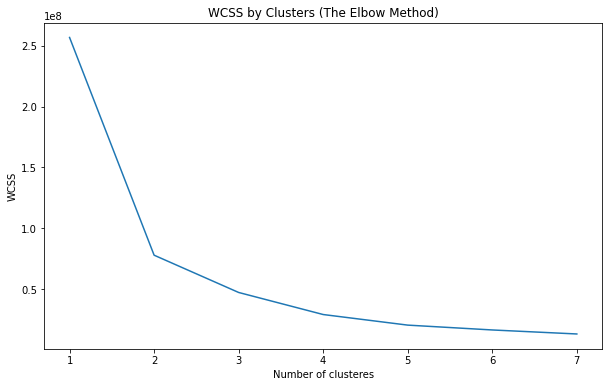

In [43]:
#Create 7 models with 1 to 7 clusteres
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(X)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
# Plot the WCSS values on lne graph
plt.figure(figsize=(10,6))
plt.plot(range(1,8), wcss)
plt.title('WCSS by Clusters (The Elbow Method)')
plt.xlabel('Number of clusteres')
plt.ylabel('WCSS')
plt.show()

The above curve predicts the dataset should have 3 clusters to get rid of outliers. It is done for just an understanding of number of cluster prediction.

In [46]:
model = KMeans(n_clusters = 2, init= 'k-means++', n_init=100, max_iter=1000)
# Fit the data and predict the cluster assignment for each data point
unscaled_km_labels = model.fit_predict(X_unscaled)
# View the cluster assigments
unscaled_km_labels

C:\Users\AYUSHI D MALAVIYA\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

Text(0.5, 1.0, 'Unscaled Cancer Data')

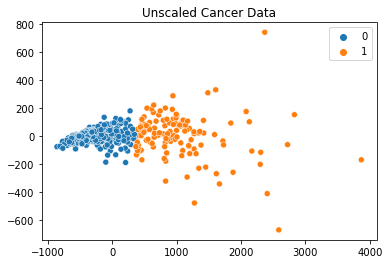

In [53]:
sns.scatterplot(x=pca_unscaled_0,y = pca_unscaled_1, data=X_unscaled, hue=unscaled_km_labels).set_title('Unscaled Cancer Data')

In [48]:
target = ['Benign', 'Malignant']
print('Accuracy Score is: ',accuracy_score(y, unscaled_km_labels)) #TP+FN/TP+TF+FP+FN
print('\n\n\nclassification_report : \n',classification_report(y, unscaled_km_labels,target_names=target),'\n\n') 
#precision = TP/TP+FP & recall = TP/TP+TN & f1_score = harmonic_mean of pre and recall 
print('Confusion Matrix of data predicted \n',confusion_matrix(y, unscaled_km_labels),'\n\n') #TP,TN,FP,FN,

Accuracy Score is:  0.8541300527240774



classification_report : 
               precision    recall  f1-score   support

      Benign       0.81      1.00      0.90       357
   Malignant       0.99      0.61      0.76       212

    accuracy                           0.85       569
   macro avg       0.90      0.81      0.83       569
weighted avg       0.88      0.85      0.84       569
 


Confusion Matrix of data predicted 
 [[356   1]
 [ 82 130]] 




#### For Scaled Dataset

In [49]:
model = KMeans(n_clusters = 2, init= 'k-means++', n_init=100, max_iter=1000)
# Fit the data and predict the cluster assignment for each data point
scaled_km_labels = model.fit_predict(X_Scaled)
# View the cluster assigments
scaled_km_labels

C:\Users\AYUSHI D MALAVIYA\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

Text(0.5, 1.0, 'Scaled Cancer Data')

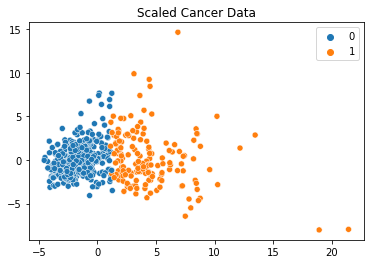

In [52]:
sns.scatterplot(x=pca_scaled_0, y = pca_scaled_1, data=X_pca_scaled, hue=scaled_km_labels).set_title('Scaled Cancer Data')

In [51]:
target = ['Benign', 'Malignant']
print('Accuracy Score is: ',accuracy_score(y, scaled_km_labels)) #TP+FN/TP+TF+FP+FN
print('\n\n\nclassification_report : \n',classification_report(y, scaled_km_labels,target_names=target),'\n\n') 
#precision = TP/TP+FP & recall = TP/TP+TN & f1_score = harmonic_mean of pre and recall 
print('Confusion Matrix of data predicted \n',confusion_matrix(y, scaled_km_labels),'\n\n') #TP,TN,FP,FN,

Accuracy Score is:  0.8980667838312829



classification_report : 
               precision    recall  f1-score   support

      Benign       0.87      0.98      0.92       357
   Malignant       0.96      0.75      0.85       212

    accuracy                           0.90       569
   macro avg       0.92      0.87      0.89       569
weighted avg       0.91      0.90      0.89       569
 


Confusion Matrix of data predicted 
 [[351   6]
 [ 52 160]] 


